In [4]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_predictions)}")

Decision Tree Accuracy: 0.9259259259259259


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")

Random Forest Accuracy: 0.9814814814814815


In [11]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_predictions)}")

ImportError: sklearn needs to be installed in order to use this module

This code first defines the base models (RandomForest and SVC) that are trained on the data independently. Next, it uses a logistic regression model as the final estimator or meta-learner. This final estimator learns how to optimally combine the predictions from the base models. After training, the stacking model's performance is evaluated on a test set to determine its accuracy.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Stacking model
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(probability=True, random_state=42))
]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sc.fit(X_train, y_train)
sc_predictions = sc.predict(X_test)
print(f"Stacking Accuracy: {accuracy_score(y_test, sc_predictions)}")

Stacking Accuracy: 1.0


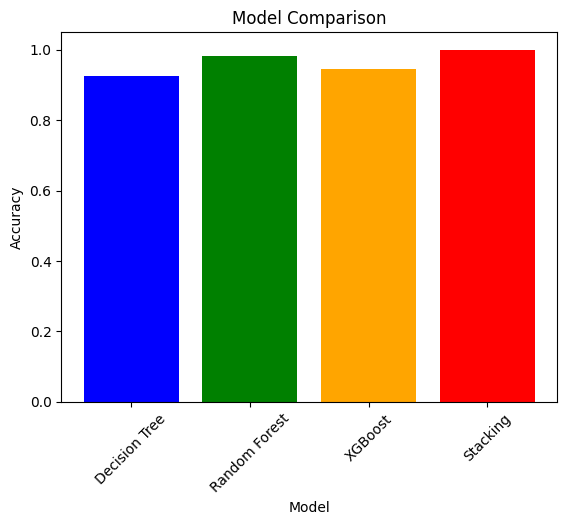

In [ ]:
accuracies = [
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, xgb_predictions),
    accuracy_score(y_test, sc_predictions)
]
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Stacking']

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Comparison')
plt.show()
